# Notebook 17: Infinitesimal strain from GPS data

The global positioning system (GPS) has revolutionized Earth sciences by providing geoscientists with real time monitoring of active deformation. Continuous GPS measurements provide mm resolution of the displacement of stations. Because the changes in distance between stations is very small (10s of mm) relative to the distance between stations (10s of km), the strains measured by GPS networks are infinitesimal. The figure below shows this problem in two dimensions, for three points on an initial configuration $\mathbf{X}$, which move to a final configuration $\mathbf{x}$:

<img src="../figures/GPS_strain.png" alt="GPS_strain" width="600" style="display: block; margin: 0 auto"/><br><br>

If the strain is homogeneous, the displacement of the stations is given by ([Allmendinger et al., 2012](https://www.cambridge.org/core/books/structural-geology-algorithms/C5AB97C135925A5D49726B741738DCA9)):

$$u_i=t_i+e_{i j} X_j\hspace{85pt}\text{(1)}$$

where $t_i$ is the translation vector and $e_{ij}$ is the displacement gradient tensor. In matrix form, this equation can be written as:

$$\left[\begin{array}{c}{ }^1 u_1 \\ { }^1 u_2 \\ { }^2 u_1 \\ { }^2 u_2 \\ \cdots \\ \cdots \\ { }^n u_1 \\ { }^n u_2\end{array}\right]=\left[\begin{array}{cccccc}1 & 0 & { }^1 X_1 & { }^1 X_2 & 0 & 0 \\ 0 & 1 & 0 & 0 & { }^1 X_1 & { }^1 X_2 \\ 1 & 0 & { }^2 X_1 & { }^2 X_2 & 0 & 0 \\ 0 & 1 & 0 & 0 & { }^2 X_1 & { }^2 X_2 \\ \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\ \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\ 1 & 0 & { }^n X_1 & { }^n X_2 & 0 & 0 \\ 0 & 1 & 0 & 0 & { }^n X_1 & { }^n X_2\end{array}\right]\left[\begin{array}{l}t_1 \\ t_2 \\ e_{11} \\ e_{12} \\ e_{21} \\ e_{22}\end{array}\right]\hspace{40pt}\text{(2)}$$

where the subscripts 1 to $n$ refer to the stations. The column vector to the right of Eq. 2 contains the unknowns, which are the two components of the translation vector ($t_1$ and $t_2$) and the four components of the displacement gradient tensor ($e_{11}$, $e_{12}$, $e_{21}$ and $e_{22}$). Therefore, in 2D there are 6 unknowns, and since each station delivers 2 equations, we need a minimum of 3 non-colinear stations to determine the strain ellipse. In 3D there are 12 unknowns an each station delivers 3 equations. Therefore we need a minimum of 4 stations to determine the strain.

Eq. 2 can be written as:

$$\mathbf{y}=\mathbf{M x}\hspace{85pt}\text{(3)}$$

where $\mathbf{y}$ is the vector with known displacements, $\mathbf{M}$ is the matrix with the location of the stations (this matrix is known as the design matrix), and $\mathbf{x}$ is the vector with the unknowns. To solve for $\mathbf{x}$, $\mathbf{y}$ is multiplied by the inverse of $\mathbf{M}$:

$$\mathbf{x}=\mathbf{M}^{-1} \mathbf{y}\hspace{85pt}\text{(4)}$$

In Python, we can use the ´np.linalg.solve´ method to solve this problem.

Once we know the displacement gradient tensor $e_{ij}$, the strain tensor can be computed as follows:

$$
\varepsilon_{i j}=\frac{1}{2}\left(e_{i j}+e_{j i}\right)=\left[\begin{array}{ccc}
e_{11} & \frac{e_{12}+e_{21}}{2} & \frac{e_{13}+e_{31}}{2} \\
\frac{e_{21}+e_{12}}{2} & e_{22} & \frac{e_{23}+e_{32}}{2} \\
\frac{e_{31}+e_{13}}{2} & \frac{e_{32}+e_{23}}{2} & e_{33}
\end{array}\right]\hspace{40pt}\text{(5)}
$$

And the rotation tensor as:

$$
\omega_{i j}=\frac{1}{2}\left(e_{i j}-e_{j i}\right)=\left[\begin{array}{ccc}
0 & \frac{e_{12}-e_{21}}{2} & \frac{e_{13}-e_{31}}{2} \\
\frac{e_{21}-e_{12}}{2} & 0 & \frac{e_{23}-e_{32}}{2} \\
\frac{e_{31}-e_{13}}{2} & \frac{e_{32}-e_{23}}{2} & 0
\end{array}\right]\hspace{40pt}\text{(6)}
$$

From the rotation tensor, the orientation (direction cosines) of the rotation axis is:

$$
r_1=\frac{-\left(\omega_{23}-\omega_{32}\right)}{2} \quad r_2=\frac{-\left(-\omega_{13}+\omega_{31}\right)}{2} \text { and } \quad r_3=\frac{-\left(\omega_{12}-\omega_{21}\right)}{2}\hspace{40pt}\text{(7)}
$$

And the amount of rotation (in radians) is:

$$
\omega=|\mathbf{r}|=\sqrt{r_1^2+r_2^2+r_3^2}\hspace{40pt}\text{(8)}
$$

## Python functions

1. The function [inf_strain](../functions/inf_strain.py) computes the infinitesimal strain and rotation from a displacement gradient.

2. The function [grid_inf_strain](../functions/grid_inf_strain.py) computes the infinitesimal strain on a grid defined by stations (e.g., GPS) data. This function uses [inf_strain](../functions/inf_strain.py) to compute the strain at the grid cells. There are two types of grids: Triangles (Delaunay), and a regular grid of rectangles. For the Delaunay grid, the stations define the vertices of the triangles. For the regular grid, there are two options: nearest neighbors within a radius $r$ from the center of the rectangle, and all stations weighted by distance. In this last case the weight is defined as:

$$
W=\exp \left[\frac{-d^2}{2 \alpha^2}\right]\hspace{40pt}\text{(9)}
$$

where $d$ is the distance from the center of the cell to the station, and $\alpha$ is a constant that tells how the impact of a station decreases with distance. A larger value of $\alpha$ "smooths out" local variations.

## Application

Let's compute the infinitesimal rotation from GPS data in Tibet and the Himalaya ([Zhang et al., 2004](https://pubs.geoscienceworld.org/gsa/geology/article/32/9/809/103748/Continuous-deformation-of-the-Tibetan-Plateau-from)). The file [tibet.txt](../data/tibet.txt) contains the UTM east and west coordinates of the GPS stations and their displacements in meters. 

Let's use Delaunay first:

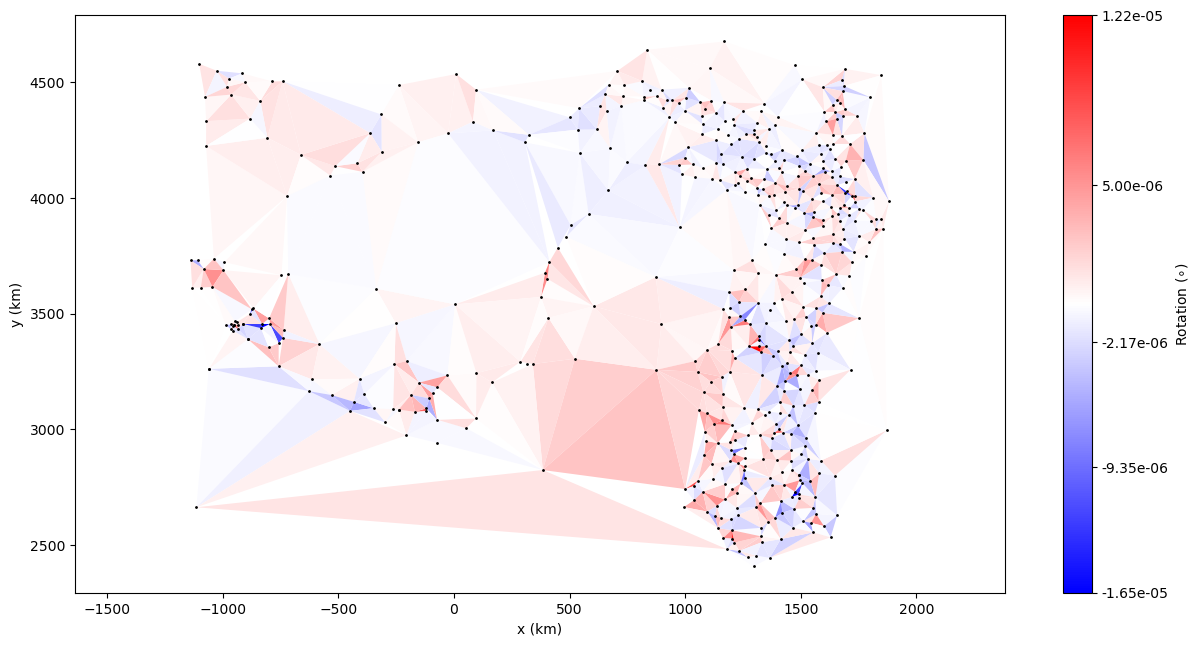

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes visible our functions folder
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import grid_inf_strain function
from grid_inf_strain import grid_inf_strain

# load Zhang et al. GPS data from the Tibetan plateau
tibet =np.loadtxt(os.path.join("..", "data", "tibet.txt"))
pos = tibet[:,0:2] # x,y coordinates
disp = tibet[:,2:4] # displacements

# rotation from Delaunay triangulation, plot stations
par = 10 * np.pi/180 # minimum internal angle of triangles
fig,ax = plt.subplots(figsize=(15,7.5))
cent,eps,ome,pstrain,rotc,maxsh = grid_inf_strain(pos,disp,0,
                                        par,2,1,fig,ax)
plt.show()

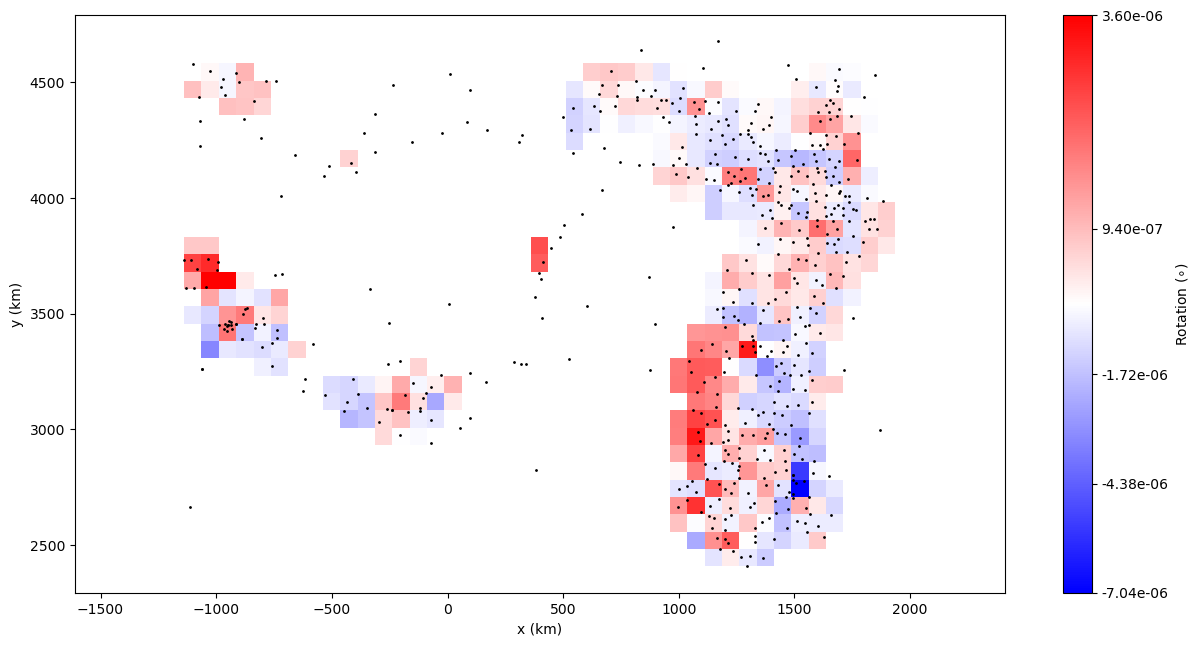

In [2]:
# rotation from nearest neighbor 
# grid spacing = 75 km, neighbors 6, 
# max. distance = 150 km, plot stations
fig,ax = plt.subplots(figsize=(15,7.5))
par=[75e3,6,150e3]
cent,eps,ome,pstrain,rotc,maxsh = grid_inf_strain(pos,disp,1,
                                        par,2,1,fig,ax)
plt.show()

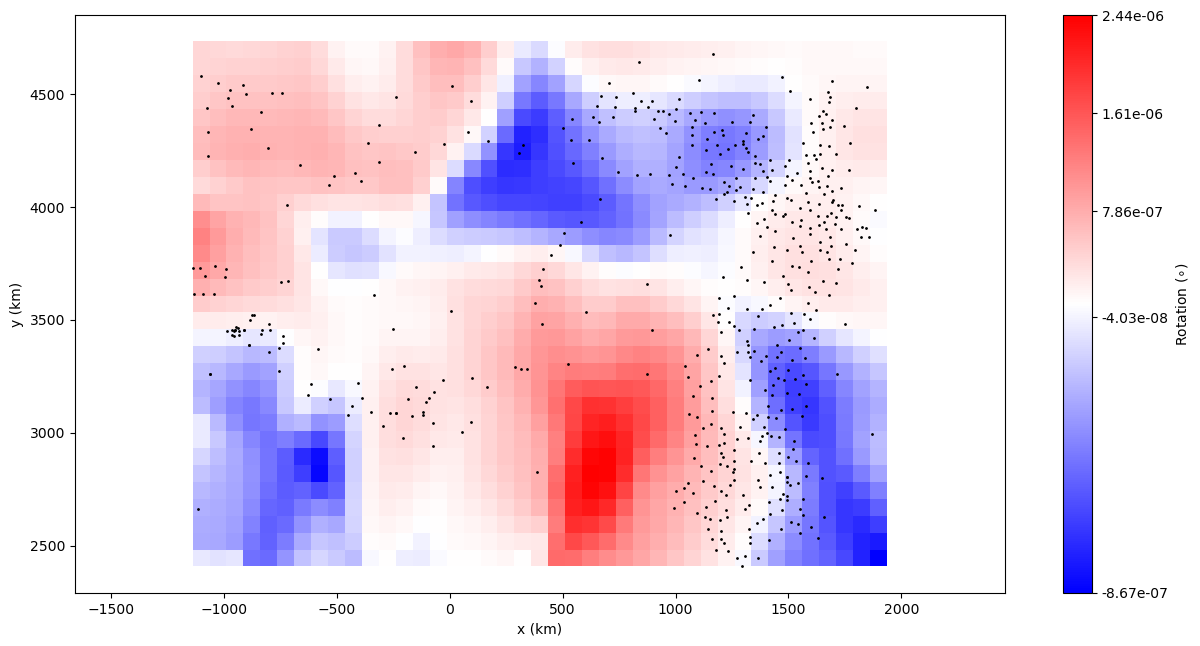

In [3]:
# rotation from distance weighted 
# grid spacing = 75 km, alpha = 150 km, plot stations
fig,ax = plt.subplots(figsize=(15,7.5))
par=[75e3,150e3]
cent,eps,ome,pstrain,rotc,maxsh = grid_inf_strain(pos,disp,2,
                                        par,2,1,fig,ax)
plt.show()

Given the uneven distribution of the stations, the distance weighted method is perhaps the best representation of the infinitesimal strain. The rotation is about a downward vertical axis. The GPS-based rotation shows large coherent domains of clockwise (positive) and counterclockwise (negative) rotation. Interestingly enough, these domains are consistent with the permanent, long-term deformation of this region ([Allmendinger et al., 2007](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2006TC002030)).